# 05_04: Math and plotting with Pandas

In [1]:
import math
import collections
import dataclasses
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

In [2]:
gapminder = pd.read_csv('gapminder.csv', dtype_backend='pyarrow', engine='pyarrow')

In [3]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41822 entries, 0 to 41821
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   country           41822 non-null  string[pyarrow]
 1   year              41822 non-null  int64[pyarrow] 
 2   region            41822 non-null  string[pyarrow]
 3   population        41822 non-null  double[pyarrow]
 4   life_expectancy   40629 non-null  double[pyarrow]
 5   age5_surviving    40490 non-null  double[pyarrow]
 6   babies_per_woman  41822 non-null  double[pyarrow]
 7   gdp_per_capita    41822 non-null  double[pyarrow]
dtypes: double[pyarrow](5), int64[pyarrow](1), string[pyarrow](2)
memory usage: 2.8 MB


In [4]:
gapminder.describe()

,year,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita
count,41822.0,41822.0,40629.0,40490.0,41822.0,41822.0
mean,1915.563818,14143381.738798,45.147504,72.596526,5.242053,6124.325212
std,62.938582,68712303.152696,16.831495,16.604898,1.728142,12328.127667
min,1800.0,1830.0,0.0,24.4,0.71,386.0
25%,1862.0,331000.0,32.0,58.4,4.22,1220.0
50%,1916.0,1920000.0,37.3,66.7,5.81,2100.0
75%,1970.0,6617500.0,60.1,89.6,6.55,4970.0
max,2023.0,1440000000.0,85.4,99.857,8.86,218000.0


In [5]:
gapminder['log_gdp_per_day'] = np.log10(gapminder['gdp_per_capita'] / 365.25)

In [6]:
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,log_gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.2,53.1,7.0,599.0,0.214837
1,Afghanistan,1806,Asia,3280000.0,28.1,53.0,7.0,599.0,0.214837
2,Afghanistan,1816,Asia,3280000.0,28.1,52.9,7.0,599.0,0.214837
3,Afghanistan,1817,Asia,3280000.0,28.0,52.9,7.0,599.0,0.214837
4,Afghanistan,1820,Asia,3290000.0,28.0,52.9,7.0,599.0,0.214837


In [7]:
gapminder_by_year = gapminder.set_index('year').sort_index()

In [8]:
gapminder_by_country = gapminder.set_index('country').sort_index()

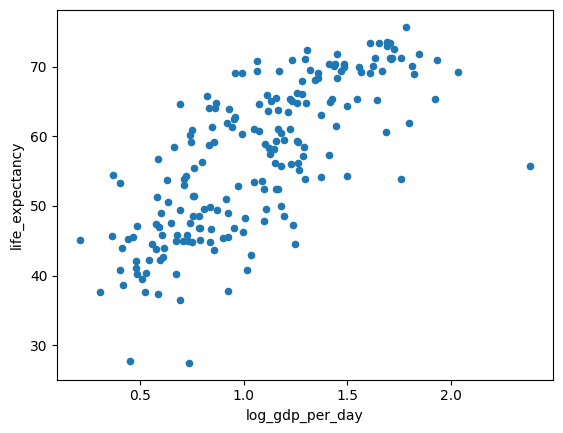

In [9]:
gapminder_by_year.loc[1960].plot.scatter('log_gdp_per_day', 'life_expectancy');

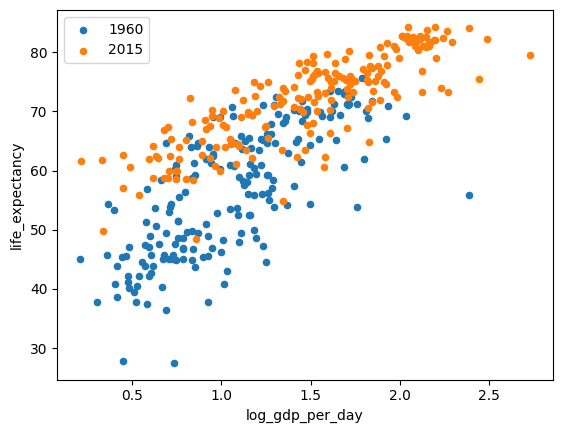

In [10]:
axes = gapminder_by_year.loc[1960].plot.scatter('log_gdp_per_day', 'life_expectancy', label=1960)
gapminder_by_year.loc[2015].plot.scatter('log_gdp_per_day', 'life_expectancy', label=2015, color='C1', ax=axes);

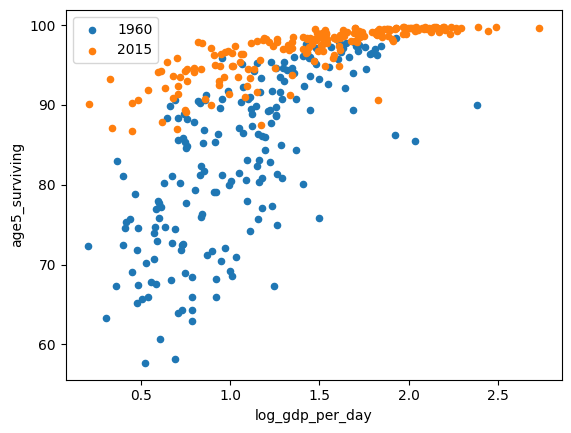

In [11]:
axes = gapminder_by_year.loc[1960].plot.scatter('log_gdp_per_day', 'age5_surviving', label=1960)
gapminder_by_year.loc[2015].plot.scatter('log_gdp_per_day', 'age5_surviving', label=2015, color='C1', ax=axes);

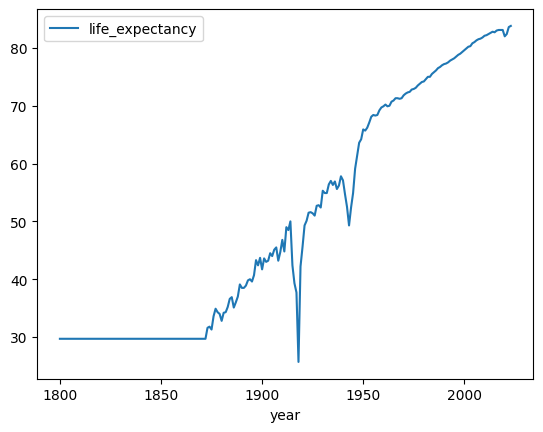

In [12]:
gapminder_by_country.loc['Italy'].sort_index().plot('year', 'life_expectancy');

Text(0, 0.5, 'life expectancy')

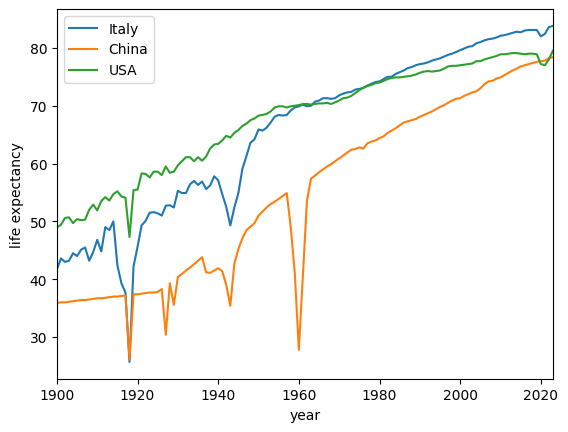

In [13]:
axes = gapminder_by_country.loc['Italy'].sort_values('year').plot('year', 'life_expectancy', label='Italy')
gapminder_by_country.loc['China'].sort_values('year').plot('year', 'life_expectancy', label='China', ax=axes)
gapminder_by_country.loc['USA'].sort_values('year').plot('year', 'life_expectancy', label='USA', ax=axes)

pp.axis(xmin=1900, xmax=2023)
pp.ylabel('life expectancy')

In [14]:
gapminder.babies_per_woman.mean()

5.242053225575057

In [15]:
gapminder.groupby('year').babies_per_woman.mean()

year
1800    6.041333
1801    5.963391
1802     5.96687
1803    5.908136
1804    6.027302
          ...   
2019    2.620205
2020    2.573538
2021    2.539897
2022    2.492359
2023    2.458308
Name: babies_per_woman, Length: 224, dtype: double[pyarrow]

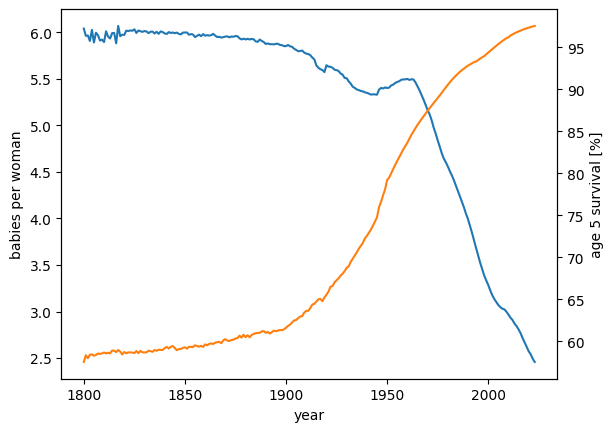

In [16]:
gapminder.groupby('year').babies_per_woman.mean().plot()
pp.ylabel('babies per woman')

gapminder.groupby('year').age5_surviving.mean().plot(secondary_y=True)
pp.ylabel('age 5 survival [%]');

In [17]:
gapminder.pivot_table('babies_per_woman', 'year', 'region')

region,Africa,America,Asia,Europe,Oceania
year,,,,,
1800,6.397593,6.041714,6.3466,5.148571,6.254286
1801,6.311923,6.052593,6.438889,5.032143,6.215714
1802,6.369286,6.035926,6.466471,4.977647,6.40625
1803,6.339286,6.034643,6.282917,5.046129,6.21
1804,6.410938,6.025769,6.486333,5.111667,6.21
...,...,...,...,...,...
2019,4.118889,1.926857,2.2914,1.535,3.002857
2020,4.047778,1.879143,2.2468,1.517619,2.957857
2021,3.978333,1.846857,2.2094,1.530952,2.931429


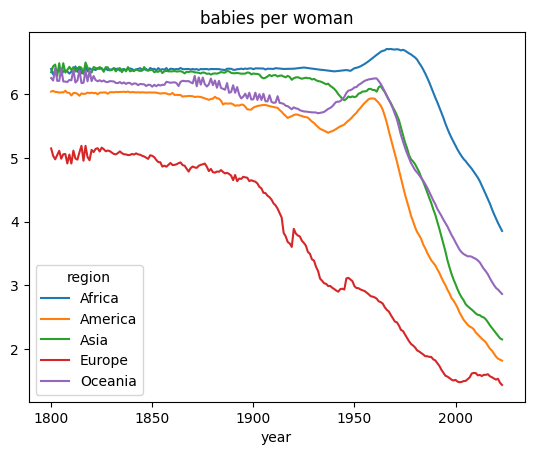

In [18]:
gapminder.pivot_table('babies_per_woman', 'year', 'region').plot()
pp.title('babies per woman');

<Axes: xlabel='year'>

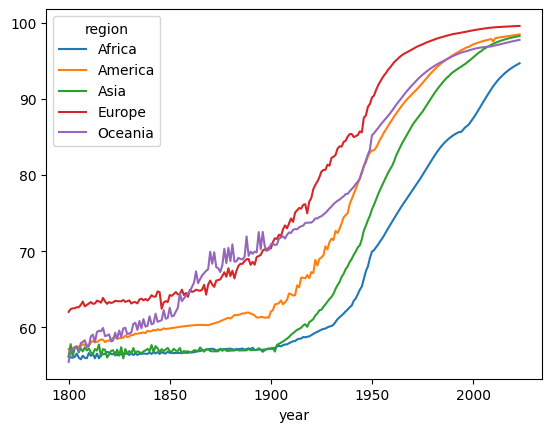

In [19]:
gapminder.pivot_table('age5_surviving', 'year', 'region').plot()